<a href="https://colab.research.google.com/github/lim-jr/ESAA-Submits/blob/main/0512%EC%9B%94%EA%B3%BC%EC%A0%9C_%EC%99%84%EB%B2%BD%EA%B0%80(562_579)_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **09 추천시스템**

## **9.1 추천시스템의 유형**
  1. 콘텐츠 기반 필터링 방식
  2. 협업 필터링 방식   
    1) 최근접 이웃 협업필터링   
        * A. 사용자 기반   
        * B. 아이템 기반  

    2) 잠재 요인 협업필터링

  



### 9.1.1 콘텐츠 기반 필터링 방식     
  사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식 


### 9.1.2 협업 필터링 방식        
  - 사용자-아이템 평점 행렬 데이터에만 의지해 추천을 수행   
  - 행: 개별 사용자,    
    열: 개별 아이템   
    값 : 평점   
  - 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소행렬의 특성을 가짐 

#### 9.1.2.1 최근접 이웃 협업 필터링        
  - 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천을 수행
  - 주목표는 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측평가하는 것임.    
  A. 사용자 기반 
    - 당신과 비슷한 고객들이 다음 상품도 구매했습니다.   
    - 특정 사용자와 타 사용자 간의 유사도를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자를 추출해 그들이 선호나는 아이템을 추천     

  B. 아이템 기반    
    - 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다.   
    - 아이템이 가지는 속성과 상관없음
    - 사용자들이 그 아이템을 좋아하는지/싫어하는지 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘
    - 사용자기반보다 아이템기반 협업 필터링이 정확도가 더 높다.   
      비슷한 영화를 좋아한다고 해서 사람들의 취향이 비슷하다고 판단하기는 어려운 경우가 많기 때문. 
    - 따라서 최근접 이웃 협업 필터링은 대부분 아이템 기반의 알고리즘을 적용함



#### 9.1.2.2 잠재 요인 협업 필터링   
- 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재요인을 추출해 추천예측을 할 수 있게하는 기법    
- 행렬분해 기반의 잠재요인 협업 필터링은 넷플릭스 경연대회에서 유명해짐
- 행렬분해 기법 : 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정    
1. 잠재요인(명확히 정의x)을 기반으로 다차원 희소 행렬인 사용자-아이템 행렬 데이터를
  (저차원 밀집 행렬의 사용자-잠재요인행렬)과 (아이템-잠재요인행렬의 전치행렬)로 분해
2. 이렇게 분해된 두 행렬의 내적을 통해
  새로운 예측 사용자-아이템 평점 행렬 데이터를 만들어서 
3. 사용자가 아직 평점을 부여하지 않은 아이템에 대한 예측 평점을 생성
- 예를 들어, 영화 평점 기반의 사용자-아이템 평점 행렬 데이터라면, 
  잠재요인은 영화가 가지는 장르별 특성 선호도로 가정할 수 있음. 
- 

## 9.2 행렬 분해의 이해


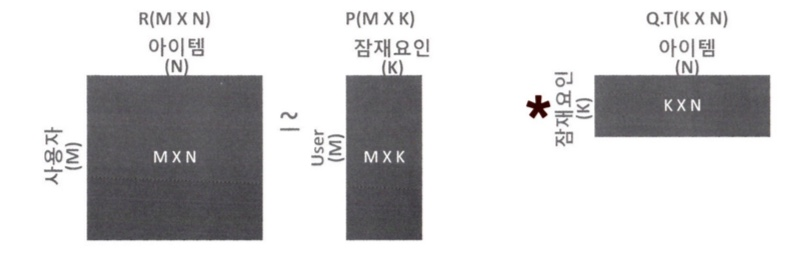

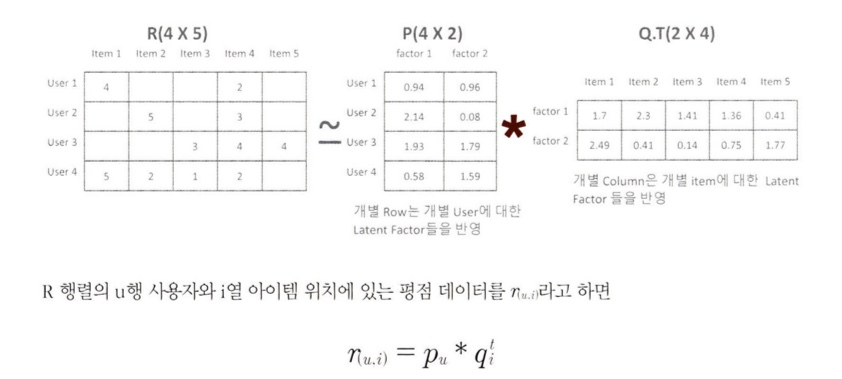

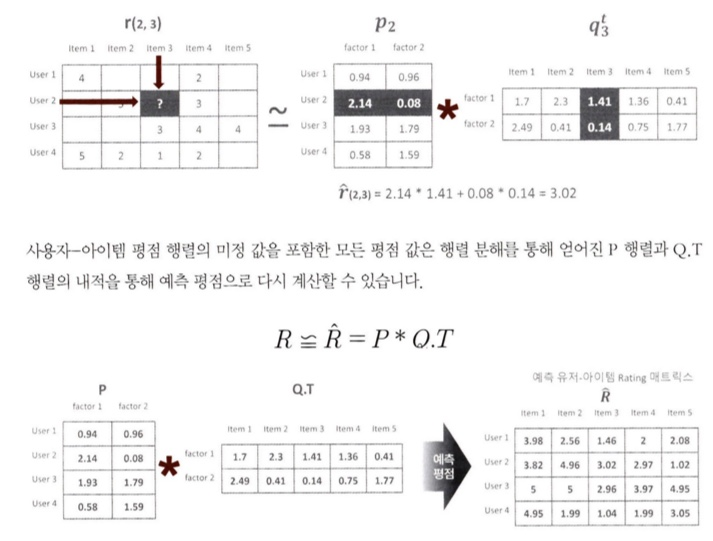

## 9.3 확률적 경사 하강법을 이용한 행렬 분해
* P와 Q 행렬로 계산된 예측 R 행렬값이 실제 R 행렬 값과 가장 최소의 오류를 가질수 있도록 
  반복적인 비용 함수 최적화를 통해 P와 Q를 유추하는 것
1. P와 Q를 임의의 행렬로 설정
2. P와 Q.T를 곱해 예측 R을 계산하고 실제 R 행렬과의 오류 값을 계산
3. 이 오류를 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 업데이트
4. 만족할만한 오류를 가질때까지 반복하며 업데이트해 근사화

In [1]:
import numpy as np

#원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3으로 설정.
R=np.array([[4, np.NaN, np.NaN, 2, np.NaN],
            [np.NaN, 5, np.NaN, 3, 1],
            [np.NaN, np.NaN, 3, 4, 4],
            [5,2,1,2,np.NaN]])
num_users, num_items=R.shape
K=3

#P와 Q의 행렬 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P=np.random.normal(scale=1./K, size=(num_users, K))
Q=np.random.normal(scale=1./K, size=(num_items, K))

In [2]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error=0
  #두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix=np.dot(P, Q.T)

  #실제 R 행렬에서 널이 아닌 값의 위치 인덱스를 추출해 실제 R 행렬롸 예측 행렬의 RMSE 추출
  x_non_zero_ind=[non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind=[non_zero[1] for non_zero in non_zeros]
  R_non_zeros=R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros=full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse=mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse=np.sqrt(mse)

  return rmse
     

In [3]:
#R>0인 행과 열의 위치, 값을 non_zeros 리스트에 저장
non_zeros=[ (i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j]>0]
steps=1000
learning_rate=0.01
r_lambda=0.01

#SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i, j, r in non_zeros:
    #실제 값과 예측 값의 차이인 오류 값 구함
    eij=r-np.dot(P[i, :], Q[j, :].T)
    #Regularization을 반영한 SGD 업데이트 공식 적용
    P[i, :]=P[i, :]+learning_rate*(eij*Q[j, :]-r_lambda*P[i, :])
    Q[j, :]=Q[j, :]+learning_rate*(eij*P[i, :]-r_lambda*Q[j, :])
  rmse=get_rmse(R, P, Q, non_zeros)
  if (step%50)==0:
    print('### iteration step : ', step, 'rmse : ', rmse)
     

### iteration step :  0 rmse :  3.2388050277987723
### iteration step :  50 rmse :  0.4876723101369648
### iteration step :  100 rmse :  0.1564340384819247
### iteration step :  150 rmse :  0.07455141311978046
### iteration step :  200 rmse :  0.04325226798579314
### iteration step :  250 rmse :  0.029248328780878973
### iteration step :  300 rmse :  0.022621116143829466
### iteration step :  350 rmse :  0.019493636196525135
### iteration step :  400 rmse :  0.018022719092132704
### iteration step :  450 rmse :  0.01731968595344266
### iteration step :  500 rmse :  0.016973657887570753
### iteration step :  550 rmse :  0.016796804595895633
### iteration step :  600 rmse :  0.01670132290188466
### iteration step :  650 rmse :  0.01664473691247669
### iteration step :  700 rmse :  0.016605910068210026
### iteration step :  750 rmse :  0.016574200475705
### iteration step :  800 rmse :  0.01654431582921597
### iteration step :  850 rmse :  0.01651375177473524
### iteration step :  900 rms

In [4]:
pred_matrix=np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


In [5]:
R

array([[ 4., nan, nan,  2., nan],
       [nan,  5., nan,  3.,  1.],
       [nan, nan,  3.,  4.,  4.],
       [ 5.,  2.,  1.,  2., nan]])